# Homework 1 | Linear Clasification and Subspaces

**Course:** CS7616  
**Name:**  Sumant Hanumante  
**GT ID:** shanumante3

In [1]:
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np
import pandas as pd
from pca import PCA
from lda import LDA
from naive_bayes_classifier import NaiveBayesClassifier
from utils import convert_zero_mean

In [2]:
%matplotlib inline

%load_ext autoreload
%autoreload 2
import pylab
pylab.rcParams['figure.figsize'] = (6.0, 4.0)

In [3]:
# load wine data
wine_df = pd.read_csv('data/wine_data.csv')
wine_df = wine_df.loc[wine_df['class'].isin([1, 2])]
wine_data = wine_df.values

In [4]:
mnist_train = pd.read_csv('data/mnist_train.csv', header=None).transpose()
mnist_test = pd.read_csv('data/mnist_test.csv', header=None).transpose()

In [5]:
mnist_train_01 = mnist_train[mnist_train[784].isin([0, 1])].values
mnist_test_01 = mnist_test[mnist_test[784].isin([0, 1])].values
mnist_train_35 = mnist_train[mnist_train[784].isin([3, 5])].values
mnist_test_35 = mnist_test[mnist_test[784].isin([3, 5])].values

## Plotting eigenvetors for PCA/LDA

* Both PCA and LDA use eigendecomposition to figure out the direction of projection for the given data.
* PCA computes the eigenvectors of the covariance matrix and the data is then rotated so as to get a diagonal covariance matrix. We may also drop the eigenvectors with low eigenvalues to reduce data dimentionality. PCA does not care about the classes and minimizes the reconstruction error.
* LDA uses the eigenvector corresponding to the largest eigenvalue of inv(Sw) * Sb [[reference]](http://www.di.univr.it/documenti/OccorrenzaIns/matdid/matdid437773.pdf)  as the direction of projection. LDA tries to project data on a plane that maximizes separation and generally would not have good reconstruction characteristics.

### Wine dataset

* For wine dataset, the eigenvectors are being shown for the entire dataset since computing eigenvalues for just 10 test samples wouldn't make much sense. In case LDA/PCA is used later on during classification, we use **only train data** and not the entire set as is done here.

#### PCA

In [13]:
pca_wine = PCA(whiten=False)
X = wine_data[:, 1:]
pca_wine.init(X)

# first eigenvector
print '1st Eigenval : ', pca_wine.eigenvals[0], '\nEigenvec: ', pca_wine.eigenvecs[:, 0]

# last eigenvector
# Natually, we cannot print 20th eigenvector as only 13 features are available
print '\n\n13th Eigenval : ', pca_wine.eigenvals[12], '\nEigenvec: ', pca_wine.eigenvecs[:, 12]


1st Eigenval :  124313.073445 
Eigenvec:  [ -1.90615566e-03   2.68379014e-04  -2.56407459e-04   4.11826686e-03
  -1.86561171e-02  -7.83110101e-04  -1.14208106e-03   1.02136703e-04
  -4.20937723e-04  -3.57515943e-03  -5.58270451e-05  -3.08914143e-04
  -9.99808098e-01]


13th Eigenval :  0.0061339899981 
Eigenvec:  [ -5.62139324e-03  -1.16925805e-02  -1.38330530e-01  -1.58640158e-03
   8.21297180e-04   5.70618175e-02  -1.96501389e-02   9.82314109e-01
   1.95062440e-02  -2.53841717e-03  -5.44626521e-02   9.35780237e-02
   7.42889379e-05]


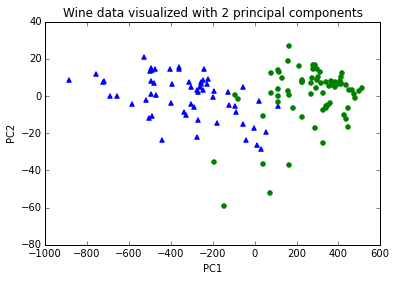

In [14]:
data = pca_wine.transform_input(2)
for label, marker, color in zip(list(set(wine_data[:, 0])), ('^', 'o'),('blue', 'green')):
    plt.scatter(x=data[wine_data[:, 0]==label, 0], y=data[wine_data[:, 0]==label, 1], 
                label=label, marker=marker, color=color)
    plt.xlabel('PC1')
    plt.ylabel('PC2')
plt.title('Wine data visualized with 2 principal components')
plt.show()

#### LDA

In [15]:
lda_wine = LDA(wine_data[:, 1:], wine_data[:, 0])
print '1st Eigenval : ', lda_wine.eigenvals[0], '\nEigenvec: ', lda_wine.eigenvecs[:, 0]
print '\n\n13th Eigenval : ', lda_wine.eigenvals[12], '\nEigenvec: ', lda_wine.eigenvecs[:, 12]

1st Eigenval :  18.5261341576 
Eigenvec:  [-0.10252817 -0.00719884 -0.03366967  0.18977244 -0.6612435   0.2025607
 -0.23774331  0.23323152  0.13104315 -0.11850553  0.13323114 -0.5604677
 -0.00241784]


13th Eigenval :  -17.9204800319 
Eigenvec:  [ 0.07401133  0.00263669 -0.00346238 -0.17458011  0.67706755  0.27899188
 -0.16271673  0.2345019   0.15638762  0.05952962  0.13670542 -0.54736453
 -0.0017877 ]


* Note that LDA gives negative eigenvalues. This is because the Sw-1 * Sb is not guaranteed to be a real-symmetric matrix.
* PCA on the other hand always gives positive eigenvalues since the covariance matrix is real symmetric.
* On the next page, we visualize the effect of whitening on the eigenvectors produced by LDA. We observe that whitening creates a good separation between classes as compared to non-whitened data.

**Visualizing effect of whitening on data split after LDA**

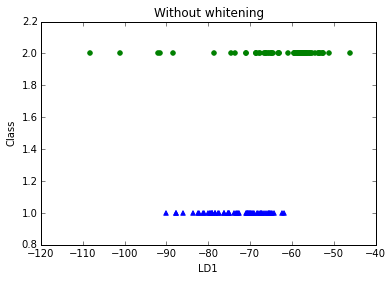

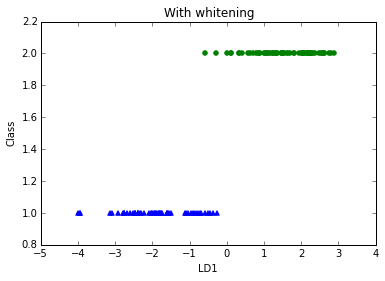

In [17]:
from utils import convert_zero_mean_unit_dev

Y = wine_data[:, 0]
labels = tuple(set(lda_wine.labels))

lda_wine = LDA(wine_data[:, 1:], Y)
data = lda_wine.transform_input(1)
for label, marker, color in zip(labels, ('^', 'o'),('blue', 'green')):
    plt.scatter(x=data[lda_wine.labels==label], y=lda_wine.labels[lda_wine.labels==label], marker=marker, color=color)
    plt.title('Without whitening')
    plt.xlabel('LD1')
    plt.ylabel('Class')
plt.show()

X = convert_zero_mean_unit_dev(wine_data[:, 1:])
lda_wine = LDA(X, Y)
data = lda_wine.transform_input(1)
for label, marker, color in zip(labels, ('^', 'o'),('blue', 'green')):
    plt.scatter(x=data[lda_wine.labels==label], y=lda_wine.labels[lda_wine.labels==label], marker=marker, color=color)
    plt.title('With whitening')
    plt.xlabel('LD1')
    plt.ylabel('Class')
plt.show()

### MNIST

#### PCA

In [33]:
print 'MNIST 01'
pca_m01 = PCA(whiten=False, method='svd')
X = mnist_train_01[:, 0:784]
pca_m01.init(X)

1st Eigenval :  3.987009616  1st eigenvector:


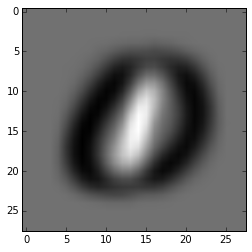

20th Eigenval :  0.59474162583  20th eigenvector:


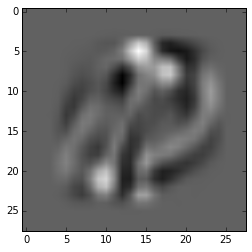

In [30]:
print '1st Eigenval : ', pca_m01.eigenvals[0], ' 1st eigenvector:'
plt.imshow(np.reshape(pca_m01.eigenvecs[:, 0], (28, 28), order='F'), cmap=cm.gray)
plt.show()

print '20th Eigenval : ', pca_m01.eigenvals[19], ' 20th eigenvector:'
plt.imshow(np.reshape(pca_m01.eigenvecs[:, 19], (28, 28), order='F'), cmap=cm.gray)
plt.show()

In [34]:
print 'MNIST 35'
pca_m35 = PCA(whiten=False, method='svd')
X = mnist_train_35[:, 0:784]
pca_m35.init(X)

1st Eigenval :  2.42917456171  1st Eigenvec


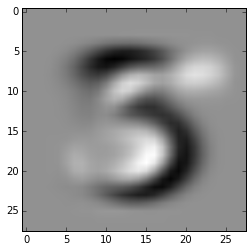

20th Eigenval :  0.71846340603  20th Eigenvec


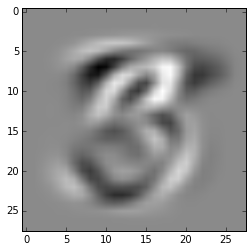

In [52]:
print '1st Eigenval : ', pca_m35.eigenvals[0], ' 1st Eigenvec'
plt.imshow(np.reshape(pca_m35.eigenvecs[:, 0], (28, 28), order='F'), cmap=cm.gray)
plt.show()
print '20th Eigenval : ', pca_m35.eigenvals[19], ' 20th Eigenvec'
plt.imshow(np.reshape(pca_m35.eigenvecs[:, 19], (28, 28), order='F'), cmap=cm.gray)
plt.show()

#### LDA

* For LDA, both the scatter matrices turn out to be illconditioned (I think this happens because there are multiple pixels in the dataset which are always 0 thus giving singular matrices).
* One way around this issue is to remove all 0-ONLY rows from the scatter matrices.
* However, given that we already have PCA, it makes more sense to project the data onto the principal basis set and then proceed with LDA (as has been done below).
* The eigenvectors that we would end up visualizing for LDA would thus be the "PCA-conditioned" versions and it would be incorrect to draw any conclusions from the eigenvectors alone.
* **From here onwards, wherever we use LDA on MNIST data, we first transform the data using PCA (the number of components are found empirically) and then perform further analysis.**

MNIST 01

1st Eigenval :  142.23946395  Eigenvec: 

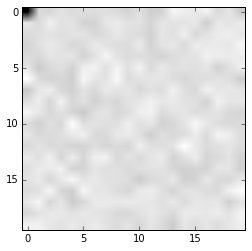

 

20th Eigenval :  -1.53140124801e-08  Eigenvec: 

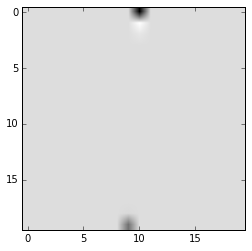

In [36]:
data = pca_m01.transform_input(400)
lda_m01 = LDA(data, mnist_train_01[:, 784])
print 'MNIST 01\n'
print '1st Eigenval : ', lda_m01.eigenvals[0], ' Eigenvec: ',
plt.imshow(np.reshape(lda_m01.eigenvecs[:, 0], (20, 20), order='F'), cmap=cm.gray)
plt.show()
print '\n\n20th Eigenval : ', lda_m01.eigenvals[19], ' Eigenvec: ', 
plt.imshow(np.reshape(lda_m01.eigenvecs[:, 19], (20, 20), order='F'), cmap=cm.gray)
plt.show()

MNIST 35

1st Eigenval :  42.2552762118  Eigenvec: 

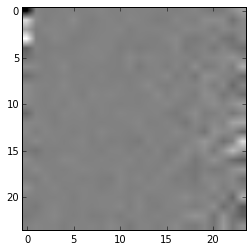

 

20th Eigenval :  -5.70216598569e-10  Eigenvec: 

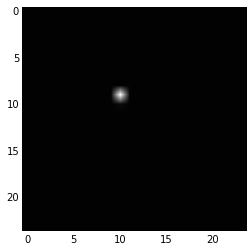

In [40]:
data = pca_m35.transform_input(576) # 576 since it is a perfect square
lda_m35 = LDA(data, mnist_train_35[:, 784])
print 'MNIST 35\n'
print '1st Eigenval : ', lda_m35.eigenvals[0], ' Eigenvec: ',
plt.imshow(np.reshape(lda_m35.eigenvecs[:, 0], (24, 24), order='F'), cmap=cm.gray)
plt.show()
print '\n\n20th Eigenval : ', lda_m35.eigenvals[19], ' Eigenvec: ', 
plt.imshow(np.reshape(lda_m35.eigenvecs[:, 19], (24, 24), order='F'), cmap=cm.gray)
plt.show()

## Plotting cumulative sum of eigenvalues for PCA/LDA

* Here we plot the cumulative sum of eigenvalues divided by the total sum. This plot gives us a measure of variance (information) retained if we used the set of corresponding eigenvectors for transforming the data.
* For LDA it doesn't really make sense to choose multiple eigenvectors for the binary classification case since the rank of the scatter matrices turns out to be at most C-1. To maximize the Fisher discriminant, we would always end up using the largest eigenvector, which has already been plotted/shown earlier.

In [15]:
# Helper function
def plot_norm_cumsum_eigenvalues(v, vline=1, title=''):
    v = v[v > 0]
    l = (np.cumsum(v)) / np.sum(v)
    plt.plot(l)
    plt.axvline(x=vline, color='black')
    plt.title(title)
    plt.show()

### Wine dataset

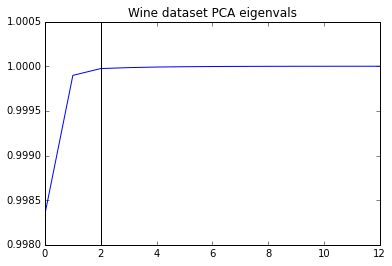

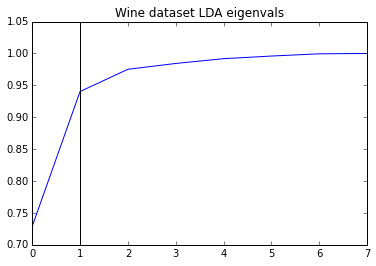

In [16]:
# Note that only 2 principal components are able to explain the variance
plot_norm_cumsum_eigenvalues(pca_wine.eigenvals, 2, 'Wine dataset PCA eigenvals')
plot_norm_cumsum_eigenvalues(lda_wine.eigenvals, 1, 'Wine dataset LDA eigenvals')

### MNIST dataset

* For the MNIST dataset, we choose just 1 eigenvector in LDA for binary classification case. Thus, I haven't plotted the cumulative sum for LDA's eigenvectors in this case (there is also the pesky issue of complex and negative eigenvalues to deal with which would completely throw off this particular analysis).

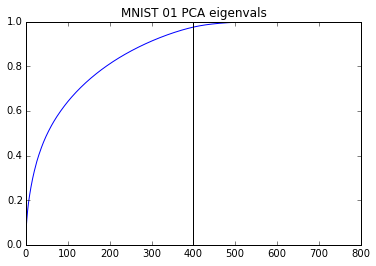

In [17]:
plot_norm_cumsum_eigenvalues(pca_m01.eigenvals, 400, 'MNIST 01 PCA eigenvals')

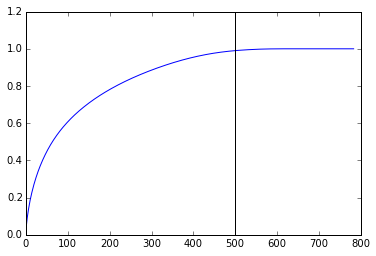

In [18]:
plot_norm_cumsum_eigenvalues(pca_m35.eigenvals, 500)

### Choosing the number of eigenvectors to use for projection

* The above plots give us an idea about the information gained by increasing the number of components. I have taken a conservative approach and choosen the number of components such that the information ratio is > 0.98. Based on the particular use case and looking at memory restrictions, we may increase or decrease this number. One can also look at the reconstruction error as a function of number of components to make this choice (as has been done in the next section). The final numbers I chose are : <br>
 * Wine : 2 <br>
 * MNIST 01 : 400 <br> 
 * MNIST 35 : 500 <br>
* Note that we require more components in case of MNIST 35. This is because the data is not as well-separated as 0-1 case (which can also be seen from the visualization of the eigenvectors done in the first section).
* Note that this choice of number of eigenvectors is with respect to minimizing the reconstruction error. It is not necessarily true that using more components would give better classification accuracy [Reference](http://jmlr.csail.mit.edu/proceedings/papers/v4/janecek08a/janecek08a.pdf). For the classification case, choosing number of components should be done using cross-validation.

## Reconstruction of data

* The reconstruction error metric used is L2 penalty (ie sum of L2 distance between actual and projected data over all samples)
* For LDA, I do not visualize the eigenvectors since they have undergone a PCA transformation beforehand and thus visualizing their reconstruction them would not provide anything resembling the actual data.
* Also note that for LDA, we are only looking for #components in the range 1-10. This is because LDA is used to project the data using C-1 eigenvectors (where C is the number of classes). Thus, we explore what the reconstrution error for LDA would be in a typical setting, unlike PCA where a large number of components can potentially be chosen.

### Wine data

#### PCA

In [19]:
print 'Wine reconstruction Error with PCA:'
for num_components in range(1, 14):
    trans = pca_wine.transform_input(num_components)
    trans = trans[:, :num_components]
    back_proj = np.dot(trans, pca_wine.eigenvecs[:, :num_components].T)
    print ' Num components : ', num_components, 'Error : ', sum(np.sqrt(sum((pca_wine.X - back_proj) ** 2)))

Wine reconstruction Error with PCA:
 Num components :  1 Error :  253.7849289
 Num components :  2 Error :  93.3624276457
 Num components :  3 Error :  57.6618884473
 Num components :  4 Error :  44.8448371426
 Num components :  5 Error :  35.4960459854
 Num components :  6 Error :  26.3298469758
 Num components :  7 Error :  20.1990503026
 Num components :  8 Error :  14.7600456611
 Num components :  9 Error :  9.70943946065
 Num components :  10 Error :  6.99687495045
 Num components :  11 Error :  3.33914221828
 Num components :  12 Error :  1.23400616751
 Num components :  13 Error :  8.1846306092e-12


##### LDA

In [20]:
print 'Wine reconstruction error with LDA:'
for num_components in range(1, 10):
    trans = lda_wine.transform_input(num_components)
    trans = trans[:, :num_components]
    back_proj = np.dot(trans, lda_wine.eigenvecs[:, :num_components].T)
    print ' Num components : ', num_components, 'Error : ', sum(np.sqrt(sum((lda_wine.X - back_proj) ** 2)))

Wine reconstruction error with LDA:
 Num components :  1 Error :  123.099633106
 Num components :  2 Error :  117.622210382
 Num components :  3 Error :  115.21519895
 Num components :  4 Error :  109.023179974
 Num components :  5 Error :  99.4662365371
 Num components :  6 Error :  92.8304548634
 Num components :  7 Error :  80.888154249
 Num components :  8 Error :  70.7776421766
 Num components :  9 Error :  60.7989032208


### MNIST Data

##### PCA

In [21]:
for num_components in range(200, 700, 50):
    trans = pca_m01.transform_input(num_components)
    trans = trans[:, :num_components]
    back_proj = np.dot(trans, pca_m01.eigenvecs[:, :num_components].T)
    print ' Num components : ', num_components, 'Error : ', sum(np.sqrt(sum((pca_m01.X - back_proj) ** 2)))

 Num components :  200 Error :  2233.98074858
 Num components :  250 Error :  1696.23935503
 Num components :  300 Error :  1192.71386573
 Num components :  350 Error :  726.916658745
 Num components :  400 Error :  325.007732688
 Num components :  450 Error :  123.801653138
 Num components :  500 Error :  40.5839340224
 Num components :  550 Error :  6.06403272373
 Num components :  600 Error :  4.1739389276e-10
 Num components :  650 Error :  4.17468308365e-10


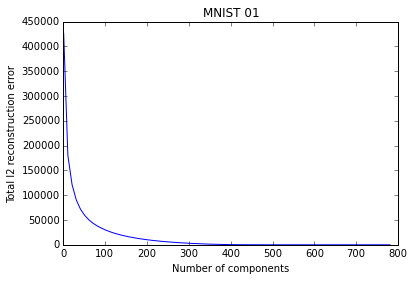

In [22]:
# Plotting the error versus number of components
error = []
components = []
for num_components in range(1, 784, 10):
    trans = pca_m01.transform_input(num_components)
    trans = trans[:, :num_components]
    back_proj = np.dot(trans, pca_m01.eigenvecs[:, :num_components].T)
    error.append(sum(sum((pca_m01.X - back_proj) ** 2)))
    components.append(num_components)
plt.plot(components, error)
plt.xlabel('Number of components')
plt.ylabel('Total l2 reconstruction error')
plt.title('MNIST 01')
plt.show()

#### Visualizing sample reconstruction for different basis set sizes

Original


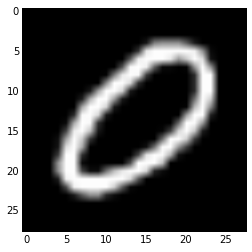

Num components  2


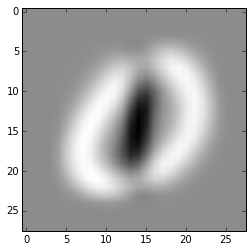

Num components  20


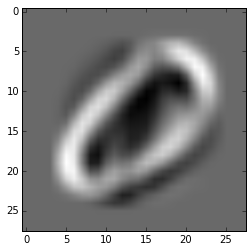

Num components  300


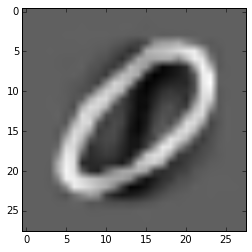

Num components  500


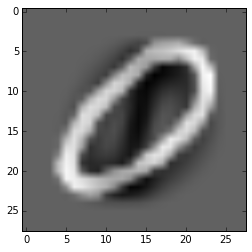

In [23]:
num_components = [2, 20, 300, 500]
sample = np.random.randint(1000)

print 'Original'
plt.imshow(np.reshape(mnist_train_01[sample, :784], (28, 28), order='F'), cmap=cm.gray)
plt.show()
for c in num_components:
    print 'Num components ', c
    trans = pca_m01.transform_input(c)
    trans = trans[:, :c]
    back_proj = np.dot(trans, pca_m01.eigenvecs[:, :c].T)
    plt.imshow(np.reshape(back_proj[sample], (28, 28), order='F'), cmap=cm.gray)
    plt.show()

From the figures above, we can see that the reconstructed image becomes closer and closer to the actual image as the number of components is increased

In [24]:
print 'MNIST 35'
for num_components in range(100, 700, 50):
    trans = pca_m35.transform_input(num_components)
    trans = trans[:, :num_components]
    back_proj = np.dot(trans, pca_m35.eigenvecs[:, :num_components].T)
    print ' Num components : ', num_components, 'Error : ', sum(np.sqrt(sum((pca_m35.X - back_proj) ** 2)))

MNIST 35
 Num components :  100 Error :  4749.91503189
 Num components :  150 Error :  3675.55470072
 Num components :  200 Error :  2926.22862092
 Num components :  250 Error :  2326.10026359
 Num components :  300 Error :  1778.92446935
 Num components :  350 Error :  1218.85688
 Num components :  400 Error :  719.739713755
 Num components :  450 Error :  363.683544754
 Num components :  500 Error :  151.36234246
 Num components :  550 Error :  45.7028887677
 Num components :  600 Error :  3.19721787119
 Num components :  650 Error :  4.51173404278e-10


* As was predicted from the cumulative sum plot of eigenvectors, around 400 eigenvectors are sufficient in 0/1 case and around 500 are sufficient for 3/5 case to get low reconsruction errors.

##### LDA

In [50]:
print 'MNIST 01'
for num_components in range(1, 10):
    trans = lda_m01.transform_input(num_components)
    trans = trans[:, :num_components]
    back_proj = np.dot(trans, lda_m01.eigenvecs[:, :num_components].T)
    print ' Num components : ', num_components, 'Error : ', sum(np.sqrt(sum((lda_m01.X - back_proj) ** 2)))

MNIST 01
 Num components :  1 Error :  9258.15741857
 Num components :  2 Error :  9242.54773475
 Num components :  3 Error :  9239.18361073
 Num components :  4 Error :  9233.41970484
 Num components :  5 Error :  9224.51890997
 Num components :  6 Error :  9216.93713907
 Num components :  7 Error :  9209.94729334
 Num components :  8 Error :  9198.74633095
 Num components :  9 Error :  9188.85521397


In [48]:
print 'MNIST 35'
for num_components in range(1, 10):
    trans = lda_m35.transform_input(num_components)
    trans = trans[:, :num_components]
    back_proj = np.dot(trans, lda_m35.eigenvecs[:, :num_components].T)
    print ' Num components : ', num_components, 'Error : ', sum(np.sqrt(sum((lda_m35.X - back_proj) ** 2)))

MNIST 35
 Num components :  1 Error :  10111.7830472
 Num components :  2 Error :  10119.2560972
 Num components :  3 Error :  10121.9021136
 Num components :  4 Error :  10111.4377677
 Num components :  5 Error :  10120.2111267
 Num components :  6 Error :  10118.9066285
 Num components :  7 Error :  10118.7340455
 Num components :  8 Error :  10113.965258
 Num components :  9 Error :  10112.7566427


* We can see that the reconstructoin error is large for LDA.

## Training and Testing

In [9]:

# Install using pip install pandas_confusion
# Source - https://github.com/scls19fr/pandas_confusion/
from pandas_confusion import ConfusionMatrix
from lda import LDA

def binary_classify(trainX, trainY, testX, testY, classifier_type):
    """IMP : The labels should be in the last column of train and test sets
    """
    classifier_types = ['lda', 'nb']
    assert classifier_type in classifier_types
    
    # For Navive Bayes, it is necessary that we have performed PCA beforehand
    # since the features are assumed to be independent and normally distributed.
    if classifier_type == 'nb':
        nbc = NaiveBayesClassifier()
        nbc.add_data(trainX, trainY)
        predY = nbc.predict(testX)
    elif classifier_type == 'lda':
        lda = LDA(trainX, trainY)
        predY = lda.predict(testX)
    return ConfusionMatrix(testY, predY)

#### Wine dataset

In [43]:
def run_wine_tests(data, run_pca=False):
    for t_size in [5, 50]:
        print '\n>>>>>>>>>>>>>>>>>>>><<<<<<<<<<<<<<<<<<<'
        print '******Test set size %d******' % t_size
        np.random.seed(1)
        samples = np.random.randint(data.shape[0], size=t_size)

        mask = np.ones(data.shape[0], dtype=bool)
        mask[samples] = False

        train = data[~mask]
        test = data[mask]
        
        trainX = train[:, 1:]
        testX = test[:, 1:]
        if run_pca:
            pca_temp = PCA()
            pca_temp.init(train[:, 1:])
            trainX = pca_temp.transform_input(2)
            testX = pca_temp.transform(2, test[:, 1:])
        for cl in ['lda', 'nb']:
            print 'Classifier : ', cl
            conf_mat = binary_classify(trainX, train[:, 0], testX, test[:, 0], cl)
            print conf_mat
            stats = conf_mat.stats_overall
            print '\nAccuracy : ', stats[u'Accuracy'], '\n'
    print '\n************************************************************************************\n'


### Confusion matrices

In [48]:
from utils import convert_zero_mean_unit_dev
print '>>>>>>>>>>>>>>>>>>>>>>>>>> WINE DATA <<<<<<<<<<<<<<<<<<<<<<<<<<<'
print '\n------------------------ Without whitening ------------------------'
run_wine_tests(wine_data, run_pca=False)

print '\n------------------------ With whitening ------------------------'
wine_data_s = np.copy(wine_data)
wine_data_s[:, 1:] = convert_zero_mean_unit_dev(wine_data_s[:, 1:])
run_wine_tests(wine_data_s, run_pca=False)

>>>>>>>>>>>>>>>>>>>>>>>>>> WINE DATA <<<<<<<<<<<<<<<<<<<<<<<<<<<

------------------------ Without whitening ------------------------ 

>>>>>>>>>>>>>>>>>>>><<<<<<<<<<<<<<<<<<<
******Test set size 5******
Classifier :  lda
Predicted  1.0  2.0  __all__
Actual                      
1.0         53    5       58
2.0          4   63       67
__all__     57   68      125

Accuracy :  0.928 

Classifier :  nb
Predicted  1.0  2.0  __all__
Actual                      
1.0          0   58       58
2.0          0   67       67
__all__      0  125      125

Accuracy :  0.536 


>>>>>>>>>>>>>>>>>>>><<<<<<<<<<<<<<<<<<<
******Test set size 50******
Classifier :  lda
Predicted  1.0  2.0  __all__
Actual                      
1.0         36    3       39
2.0          4   44       48
__all__     40   47       87

Accuracy :  0.919540229885 

Classifier :  nb
Predicted  1.0  2.0  __all__
Actual                      
1.0         39    0       39
2.0          1   47       48
__all__     40   47       87

Acc

#### MNIST

In [23]:
def run_classifiers_mnist(train_dataX, train_dataY, test_dataX, test_dataY, 
                          classifiers=['lda', 'nb'], verbose=True):
    accuracies = []
    for cl in classifiers:
        conf_mat = binary_classify(train_dataX, train_dataY, test_dataX, test_dataY, cl)
        stats = conf_mat.stats_overall
        if verbose:
            print 'Classifier : ', cl
            print conf_mat
            print '\nAccuracy : ', stats[u'Accuracy']
            print '\n************************************************************************************'
        accuracies.append(stats[u'Accuracy'])
    return accuracies

In [8]:
X = mnist_train_01[:, 0:784]
X = X - np.repeat(np.mean(X, axis=0, keepdims=True), X.shape[0], axis=0)
pca_m01_zm = PCA(whiten=True, method='svd')
pca_m01_zm.init(X)

X = mnist_train_35[:, 0:784]
X = X - np.repeat(np.mean(X, axis=0, keepdims=True), X.shape[0], axis=0)
pca_m35_zm = PCA(whiten=True, method='svd')
pca_m35_zm.init(X)

In [46]:
X = mnist_train.values[:, 0:784]
X = X - np.repeat(np.mean(X, axis=0, keepdims=True), X.shape[0], axis=0)
pca_mall_zm = PCA(whiten=True, method='svd')
pca_mall_zm.init(X)
num_components = 10
train_data = pca_mall_zm.transform_input(num_components)
test_data = pca_mall_zm.transform(num_components, mnist_test.values[:, 0:784])
acc = run_classifiers_mnist(train_data, mnist_train.values[:, 784], test_data, mnist_test.values[:, 784])

* Note here that the number of principal components chosen is lower as compared to what the plots in section 2 showed. This is because there is no direct relation between lowering reconstruction error and the classification accuracy i.e. feature subset selection is independent of the variance information content and smaller number of components seemed to work better empirically.

In [51]:
num_components = 10
print '>>>>>>>>>>>>>>>>>>>>>>>>>> MNIST 01 Data <<<<<<<<<<<<<<<<<<<<<<<<<<<'
print '\n------------------------ Without whitening ------------------------'
train_data = pca_m01.transform_input(num_components)
test_data = pca_m01.transform(num_components, mnist_test_01[:, 0:784])
acc = run_classifiers_mnist(train_data, mnist_train_01[:, 784], test_data, mnist_test_01[:, 784])

print '\n------------------------ With whitening ------------------------'
train_data = pca_m01_zm.transform_input(num_components)
test_data = pca_m01_zm.transform(num_components, mnist_test_01[:, 0:784])
acc = run_classifiers_mnist(train_data, mnist_train_01[:, 784], test_data, mnist_test_01[:, 784])


print '\n>>>>>>>>>>>>>>>>>>>>>>>>>> MNIST 35 Data <<<<<<<<<<<<<<<<<<<<<<<<<<<'
print '\n------------------------ Without whitening ------------------------'
train_data = pca_m35.transform_input(num_components)
test_data = pca_m35.transform(num_components, mnist_test_35[:, 0:784])
acc = run_classifiers_mnist(train_data, mnist_train_35[:, 784], test_data, mnist_test_35[:, 784])

print '\n------------------------ With whitening ------------------------'
train_data = pca_m35_zm.transform_input(num_components)
test_data = pca_m35_zm.transform(num_components, mnist_test_35[:, 0:784])
acc = run_classifiers_mnist(train_data, mnist_train_35[:, 784], test_data, mnist_test_35[:, 784])

>>>>>>>>>>>>>>>>>>>>>>>>>> MNIST 01 Data <<<<<<<<<<<<<<<<<<<<<<<<<<<

------------------------ Without whitening ------------------------
Classifier :  lda
Predicted  0.0   1.0  __all__
Actual                       
0.0        970    10      980
1.0          0  1135     1135
__all__    970  1145     2115

Accuracy :  0.995271867612

************************************************************************************
Classifier :  nb
Predicted  0.0   1.0  __all__
Actual                       
0.0        979     1      980
1.0         11  1124     1135
__all__    990  1125     2115

Accuracy :  0.994326241135

************************************************************************************

------------------------ With whitening ------------------------
Classifier :  lda
Predicted  0.0   1.0  __all__
Actual                       
0.0        972     8      980
1.0          0  1135     1135
__all__    972  1143     2115

Accuracy :  0.99621749409

*************************************

## Accuracy Table

In [ ]:
+----------------------+--------+-------------+
|       DataSet        |  LDA   | Naive_Bayes |
+----------------------+--------+-------------+
| Wine_test5           | 92.8%  | 53.6%       |
| Wine_test50          | 91.9%  | 98.8%       |
| Wine_test5 Whitened  | 76%    | 53.6%       |
| Wine_test50 Whitened | 94.2%  | 98.8%       |
| MNIST01              | 99.52% | 99.43%      |
| MNIST01 Whitened     | 99.62% | 99.43%      |
| MNIST35              | 86.96% | 90.74%      |
| MNIST35 Whitened     | 91.06% | 90.74%      |
+----------------------+--------+-------------+

In [28]:
# accr = []
# # Important observation : It is not necessary that the accuracy increases with increase in number of principal
# # components, thus we should use cross validation to choose the number of components.
# for num_components in [2, 5, 10, 20, 50, 100, 200, 400, 600]:
#     train_data = pca_m35_zm.transform_input(num_components)
#     test_data = pca_m35_zm.transform(num_components, mnist_test_35[:, 0:784])
#     accuracy = run_classifiers_mnist(train_data, mnist_train_35[:, 784], test_data, 
#                                      mnist_test_35[:, 784], ['lda'], False)
#     accr.append((num_components, accuracy[0]))
# print accr

### K-fold Cross validation on wine dataset


In [17]:
# k-fold crossvalidation code
# I've used a helper function available in scikit which will generate the indices
# for k-fold CV.
from sklearn.cross_validation import KFold
def run_k_fold_cv(dataX, dataY, n_folds, classifier_type):
    classifier_types = ['lda', 'nb']
    assert classifier_type in classifier_types
    kf = KFold(dataX.shape[0], n_folds=n_folds, shuffle=True)
    accuracies = []
    for train_index, test_index in kf:  
        trainX = dataX[train_index]
        trainY = dataY[train_index]
        testX = dataX[test_index]
        testY = dataY[test_index]
        if classifier_type == 'nb':
            nbc = NaiveBayesClassifier()
            nbc.add_data(trainX, trainY)
            predY = nbc.predict(testX)
        elif classifier_type == 'lda':
            lda = LDA(trainX, trainY)
            predY = lda.predict(testX)
        accuracy = np.sum([testY == predY]) / float(testY.shape[0])
        accuracies.append(accuracy)
    return accuracies

In [18]:
for cl in ['lda', 'nb']:
    print '\n************************************************************************************\n'
    print 'Classifier : ', cl
    print 'Mean accuracy : ', np.mean(run_k_fold_cv(wine_data[:, 1:], wine_data[:, 0], 10, cl))


************************************************************************************

Classifier :  lda
Mean accuracy :  0.923076923077

************************************************************************************

Classifier :  nb
Mean accuracy :  0.976923076923


## Results (Description and Analysis)


**Methodology** <br>

* LDA : In order to use LDA to reduce dimentionality, I've used the Fisher discriminant function (and its extension  for multiclass case). To use LDA as a classifier, I look at the log-ratio of probabilites and choose the class with the highest probabiliy.
* Naive Bayes : In, Naive Bayes I've inferred the class priors from the training set. This is not a good approach in general since data collection might be skewed, but the impact is not significant for the given datasets. Naive bayes sometimes also makes a simplifying assumption of the variance being same accross classes (ie there is a common source of noise). I have ignored this assumption and used per-class covariance while computing the gaussian probability.

***

**Analysis** <br>

* Whitening the data (0 mean and unit variance) has a significant impact on the classification accuracy and it is an important pre-processing step. (Look at the whitened vs non-whitened plot for LDA shown in the first section for an illustration of this impact)
* In case of Naive Bayes, performing PCA on the data beforehand helps improve accuracy. One way this can be explained is that NB assumes independent features, and PCA transforms the data so as to give diagonal covariance matrix, thus satisfying a necessary condition for independence.
* Both the classifiers achieve ~99% accuracy on the MNIST 01 dataset while it is ~90% for MNIST 35. It thus seems harder to classify latter dataset. This may be because 3 and 5 are not as well-separable as 0 and 1. This fact is also evident from by plotting the first eigenvector (as done in section 2) which shows a better distinction for the 0/1 case.
* For the case of training wine data with just 5 samples, it is evident that we would get a very poor classifier. The NB classifier in this case always ends up predicting the same class. However, LDA is still able to achieve ~86% accuracy which is surprising. Maybe it latches on to a particularly distinctive feature and is able to learn that from just the 5 samples that it sees.

***

**Multiclass Classifiers** <br>

* For using LDA as a multiclass classifier, the data is first sphered (as suggested in Elements of Statistical Learning) and then the separating hyperplanes are computed for each pair of classes.
* With NB, the same assumptions about feature independence need to be adhered to for multiclass case. The predicted class is givenn by one that gives highest probability conditioned on Y (assuming equal priors).
* In terms of code, the same code should work for multiclass classifier. There are no assumptions made about the number of classes while coding the classifiers. In the multiclass case, it becomes even more important to whiten the data before running it through a classifier.


## Extra Credit

In [ ]:
# Since the code does not worry about the number of classes, I tried to run my LDA 
# and NB implementations on the entire MNIST dataset and obtained the following 
# results : 

Classifier :  lda
Predicted  0.0   1.0  3.0  5.0  __all__
Actual                                 
0.0        901     0    7   72      980
1.0          0  1102    4   29     1135
3.0          9    30  875   96     1010
5.0         21    63  109  699      892
__all__    931  1195  995  896     4017

Accuracy :  0.890465521533

************************************************************************************

Classifier :  nb
Predicted  0.0   1.0  3.0  5.0  __all__
Actual                                 
0.0        913     0    8   59      980
1.0          0  1095   24   16     1135
3.0          9    13  860  128     1010
5.0         30     5   82  775      892
__all__    952  1113  974  978     4017

Accuracy :  0.906895693303

************************************************************************************